# Code to pre process images of droplets

In [16]:
'''
pip install openvc-python
pip install cvlib
pip install tensorflow
'''

import numpy as np
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import pandas as pd
from cvlib.object_detection import draw_bbox
from ipywidgets import *

Code to see an image:

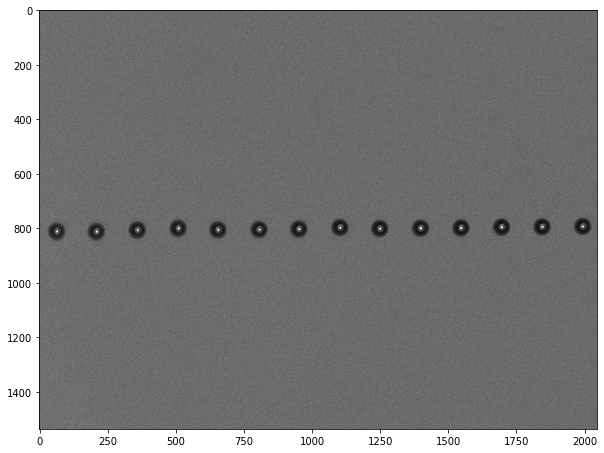

In [17]:
directory = 'Test_Images/'  # Directory where image is
file_name = '1.5mm_53.6ul_254.5kHz'  # file name
file_type = 'png'
img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))

# Showing the loaded picture
plt.figure(figsize=(10, 10))

# order of RGB needs to be changed for plt imshow to work
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Code to read in image in Grayscale, try to find circles and then show where the circles are:

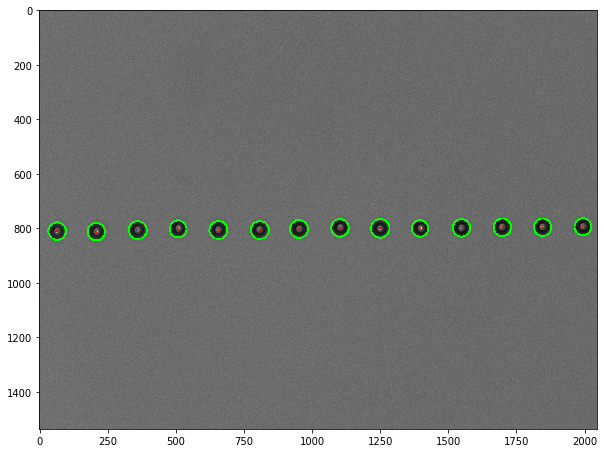

In [18]:
directory = 'Test_Images/'  # Directory where image is
file_name = '1.5mm_53.6ul_254.5kHz'  # file name
file_type = 'png'
# The zero means that it will load in grayscale only
in_img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))


in_img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

# dp Inverse ratio of the accumulator resolution to the image resolution.
dp = 1
# minDist Minimum distance between the centers of the detected circles.
minDist = 40
# param1
param1 = 80
# param2
param2 = 20
# minRadius
minRadius = 5
# maxRadius
maxRadius = minRadius+45
circles = cv2.HoughCircles(in_img_gray,
                           cv2.HOUGH_GRADIENT,
                           dp,
                           minDist,
                           param1=param1,
                           param2=param2,
                           minRadius=minRadius,
                           maxRadius=maxRadius)
# circles is a matrix with elements x_pos,y_pos,radius in pixels
circles = np.uint16(np.around(circles))


output = in_img.copy()

for i in circles[0, :]:
    #	draw	the	outer	circle
    cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 6)
    #	draw	the	center	of	the	circle
    cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [96]:
def param_test(in_img, param1=80, param2=20, minRadius=5, maxRadius=50):

    in_img_gray = cv2.cvtColor(
        in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

    circles = cv2.HoughCircles(in_img_gray,
                               cv2.HOUGH_GRADIENT,
                               1,
                               120,
                               param1=param1,
                               param2=param2,
                               minRadius=minRadius,
                               maxRadius=maxRadius)
    circles = np.uint16(np.around(circles))

    output = in_img.copy()
    for i in circles[0, :]:
        #	draw	the	outer	circle
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 6)
        #	draw	the	center	of	the	circle
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

    return circles


directory = 'Test_Images/'  # Directory where image is
#file_name = '1.5mm_53.6ul_254.5kHz'  # file name # Straight train
#file_name = '26.5mm_53.6ul_254.5kHz-02122020182515-19' #Further out, not a nice train
#file_name = '26.5mm_53.6ul_254.5kHz-02122020182514-13' # 3 sharp, some not in focus
#file_name = '39.0mm_53.6ul_254.5kHz-02122020190603-1186'  # 1 sharp
#file_name = '466.5kHz_4bar_50mm-10092019144205-1'  # one speckled
#file_name = '466.5kHz_4bar_50mm-10092019144210-20'  # one cracked, one round
#file_name = '466.5kHz_4bar_50mm-10092019144229-79'  # one with rugged cirmumference (escaping small droplet)


file_type = 'png'
# The zero means that it will load in grayscale only
in_img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))


in_img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

interactive_plot = interactive(param_test, in_img=fixed(in_img), param1=(0, 100), param2=(
    0, 100), minRadius=(0, 100), maxRadius=(0, 100))
interactive_plot

interactive(children=(IntSlider(value=80, description='param1'), IntSlider(value=20, description='param2'), In…

In [97]:
# trick to get the result out from the itneractive plot:
circles = interactive_plot.result

[[[ 508 1236   20]]]
[1236]


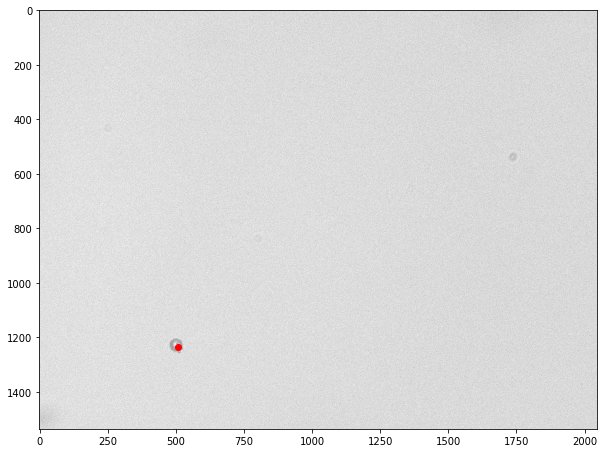

In [98]:
print(circles)
print(circles[0, :, 1])
x = circles[0, :, 0]
y = circles[0, :, 1]
plt.figure(figsize=(10, 10))
plt.imshow(in_img)
plt.scatter(x, y, c='red')  # test to see where te centers are

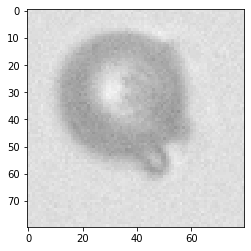

In [99]:
x_positions = circles[0, :, 0]
y_positions = circles[0, :, 1]
radii = circles[0, :, 2]

cut_from = in_img.copy()

for circle_index, value in enumerate(x_positions):
    x_pos = x_positions[circle_index]
    y_pos = y_positions[circle_index]
    radius = radii[circle_index]
    if circle_index > -1:
        # image_i=cut_from[x_pos:radius,y_pos:radius]
        image_i = cut_from[y_pos-radius*2:y_pos +
                           radius*2, x_pos-radius*2:x_pos+radius*2]
        plt.imshow(image_i)
        cv2.imwrite('{0}/Cuts/{1}_x_{2}y_{3}r_{4}_cut{5}.png'.format(
            directory, file_name, x_pos, y_pos, radius, circle_index), image_i)
    else:
        break
plt.imshow(image_i)

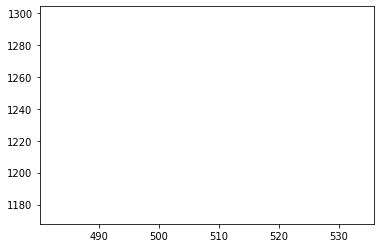

In [100]:
# sorting, also reducing dimensions to 2. This is to get the distances in order.
circles_sorted = circles[0][np.argsort(circles[0][:, 0], axis=0)].astype(float)
x = np.array(circles_sorted[:, 0])
y = np.array(circles_sorted[:, 1])


plt.plot(x, y)


dist = [np.sqrt(
    np.power(x[i+1]-x[i], 2) +
    np.power(y[i+1]-y[i], 2))
    for i in range(len(x)-1)]  # This gives very unlrealistic results on the disatnce between droplets

In [101]:
print(dist)
np.average(dist)

[]


/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

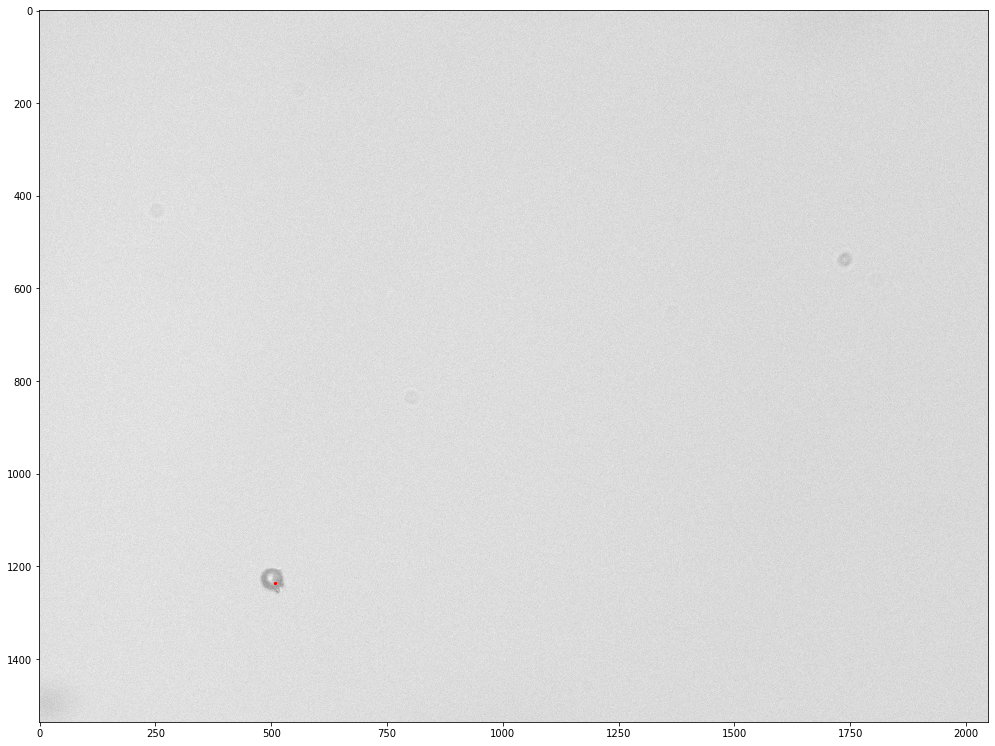

In [102]:
plt.figure(figsize=(17, 17))
plt.imshow(in_img)
plt.scatter(x, y, c='red', s=5)  # test to see where te centers are

interactive(children=(IntSlider(value=99, description='thresh', max=255, min=1), IntSlider(value=255, descript…

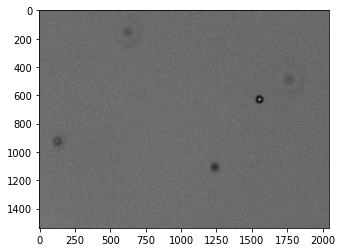

In [103]:
def param_test(in_img, thresh=99, maxval=255):

    in_img_gray = cv2.cvtColor(
        in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

    ret, thresh_img = cv2.threshold(gray, thresh, maxval,cv2.THRESH_BINARY_INV)#,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB), cmap='gray_r')
    return thresh_img


directory = 'Test_Images/'  # Directory where image is
# file_name = '1.5mm_53.6ul_254.5kHz'  # file name # Straight train
# file_name = '26.5mm_53.6ul_254.5kHz-02122020182515-19' #Further out, not a nice train
# file_name = '26.5mm_53.6ul_254.5kHz-02122020182514-13' # 3 sharp, some not in focus
file_name = '39.0mm_53.6ul_254.5kHz-02122020190603-1186'  # 1 sharp


file_type = 'png'
# The zero means that it will load in grayscale only
in_img = cv2.imread('{0}{1}.{2}'.format(directory, file_name, file_type))

plt.imshow(cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB), cmap='gray_r')


in_img_gray = cv2.cvtColor(in_img, cv2.COLOR_BGR2GRAY)  # grayscale concversion

interactive_plot = interactive(param_test, in_img=fixed(in_img.copy()), thresh=(1, 255), maxval=(
    0, 255),)
interactive_plot

In [104]:
thresh = interactive_plot.result

In [105]:
# Noise removal using Morphological
# closing operation
kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
                           kernel, iterations=5)

# Background area using Dialation
bg = cv2.dilate(closing, kernel, iterations=5)

# Finding foreground area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0)

plt.imshow(dist_transform, cmap='gray')

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


In [ ]:
def apply_mask(frame, mask):
    """Apply binary mask to frame, return masked image.
    """
    return cv2.bitwise_and(frame, frame, mask=mask)

masked=apply_mask(in_img_gray,closing)

plt.figure(figsize=(10,10))
plt.imshow(masked, cmap='gray')


#NOT SO GREAT RESULTS